# Coba 1 


In [ ]:
from pandas import read_csv
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = read_csv('BBRI.JK.csv', header=0, index_col=0, parse_dates=True)
series = df['Close']
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-05,4750.0,4760.0,4570.0,4640.0,4582.378906,292142000
2023-01-06,4550.0,4640.0,4550.0,4620.0,4562.627441,175932000
2023-01-09,4580.0,4640.0,4550.0,4590.0,4533.000000,166164900
2023-01-10,4550.0,4570.0,4410.0,4430.0,4430.000000,282510000
2023-01-11,4410.0,4430.0,4360.0,4380.0,4380.000000,211610100


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2494.000000,2494.000000,2494.000000,2494.000000,2494.000000,2.494000e+03
mean,3081.280283,3114.662398,3044.806020,3079.134405,2711.655501,1.420169e+08
std,1009.810910,1016.282387,997.968523,1006.913971,1070.886172,9.038373e+07
min,1270.000000,1310.000000,1240.000000,1270.000000,972.820251,0.000000e+00
25%,2200.000000,2225.000000,2180.000000,2200.000000,1757.721741,8.654002e+07
50%,3027.500000,3060.000000,2990.000000,3030.000000,2604.870850,1.209706e+08
75%,4087.500000,4130.000000,4040.000000,4080.000000,3742.108704,1.743450e+08
max,5000.000000,5025.000000,4920.000000,4980.000000,4918.156738,8.726073e+08


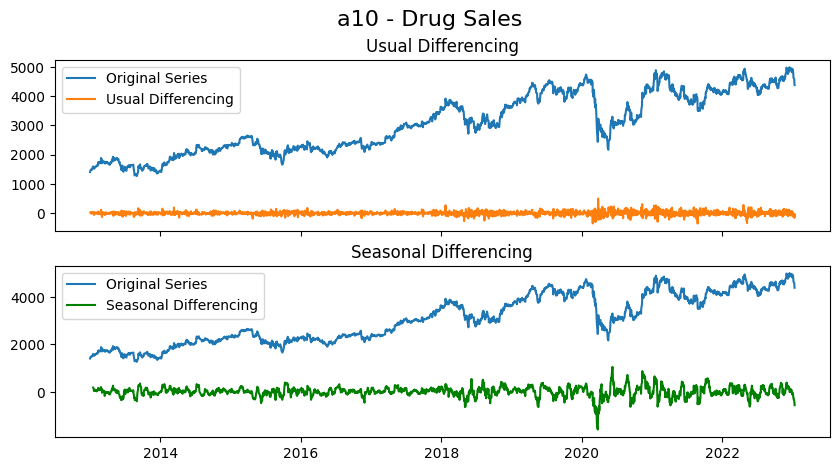

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(series[:], label='Original Series')
axes[0].plot(series[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(series[:], label='Original Series')
axes[1].plot(series[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: xlabel='Date'>

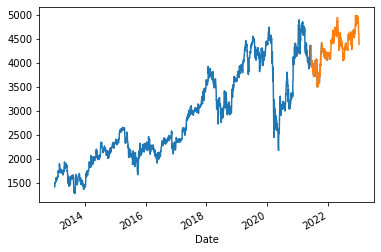

In [ ]:
train, test = series[:2246], series[2100:]
n = len(series)
n_train = len(train)
n_test = len(test)

fig, ax = pyplot.subplots()
train.plot(ax=ax)
test.plot(ax=ax)

In [ ]:
import pmdarima as pm

def arimamodel(timeseries):
  automodel = pm.auto_arima(timeseries,
                            start_p=0,
                            start_q=2,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=None, D=1, trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)
  return automodel

In [ ]:
automodel = arimamodel(train)
print(automodel.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=27246.020, Time=15.96 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=30178.293, Time=0.17 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=25685.831, Time=10.21 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=28065.203, Time=14.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=30186.664, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=26247.683, Time=0.43 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=25394.507, Time=45.25 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=31.43 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=9.35 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=30178.961, Time=4.89 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=25392.161, Time=46.73 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=25680.349, Time=12.63 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=35.28 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=14.90 sec
 ARIMA(3,0,0)(2,1,0)

In [ ]:
test.shape

(394,)

In [ ]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

2246    4258.807352
2247    4242.633301
2248    4205.377931
2249    4196.230688
2250    4203.084489
           ...     
2635    4189.154367
2636    4246.131590
2637    4200.220767
2638    4211.391036
2639    4208.633398
Length: 394, dtype: float64

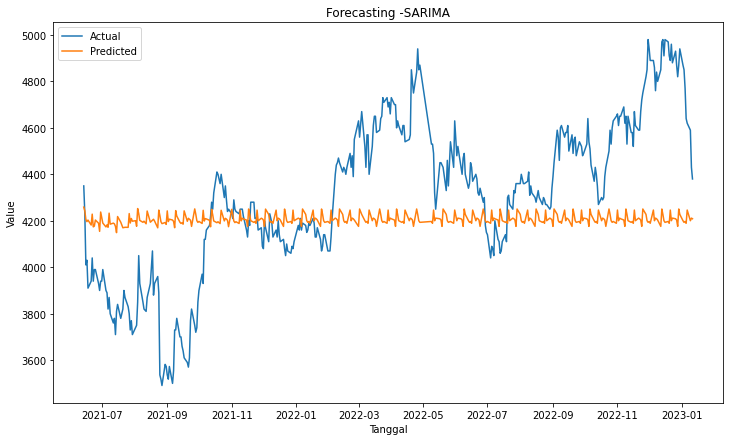

In [ ]:
pyplot.figure(figsize=(12,7))
pyplot.plot(test.index, test, label='Actual')
pyplot.plot(test.index, predictions_arima, label='Predicted')
pyplot.title('Forecasting -SARIMA')
pyplot.xlabel('Tanggal')
pyplot.ylabel('Value')
pyplot.legend()

In [ ]:
rmse = sqrt(mean_squared_error(test, predictions_arima))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 348.307


<Axes: >

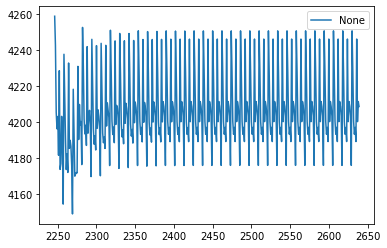

In [ ]:
predictions_arima.plot(legend = True)

In [ ]:
predictions_arima.describe()

count     394.000000
mean     4206.995336
std        22.233421
min      4148.928732
25%      4193.216260
50%      4200.312714
75%      4211.391036
max      4258.807352
dtype: float64

# Coba 2

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = read_csv('BBRI.JK.csv', header=0, index_col=0, parse_dates=True)
series = df['Close']
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-05,4750.0,4760.0,4570.0,4640.0,4582.378906,292142000
2023-01-06,4550.0,4640.0,4550.0,4620.0,4562.627441,175932000
2023-01-09,4580.0,4640.0,4550.0,4590.0,4533.000000,166164900
2023-01-10,4550.0,4570.0,4410.0,4430.0,4430.000000,282510000
2023-01-11,4410.0,4430.0,4360.0,4380.0,4380.000000,211610100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2494 entries, 2013-01-02 to 2023-01-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2494 non-null   float64
 1   High       2494 non-null   float64
 2   Low        2494 non-null   float64
 3   Close      2494 non-null   float64
 4   Adj Close  2494 non-null   float64
 5   Volume     2494 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 136.4 KB


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
#Deklarasi fungsi untuk mengecek stasioneritas data
# Deklarasi fungsi untuk mengecek stasioner data
from statsmodels.tsa.stattools import adfuller
def test_stasionarity(timeseries):
  # Determinate rolling statis
  rolmen = timeseries.rolling(window =12).mean()
  rolstd = timeseries.rolling(window=12).std()

  # Plot rolling statistic :
  orig = plt.plot(timeseries, color='blue', label = 'Original')
  mean = plt.plot(rolmen, color='red', label = 'Rolling Mean')
  std = plt.plot(rolstd, color='black', label= 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  #Perform Dickey-Fuller test
  print('Result of Dickey-Fuller Test: ')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index = ['Test Statuctic', 'p-value','#Lags Used', 'Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
  print(dfoutput)

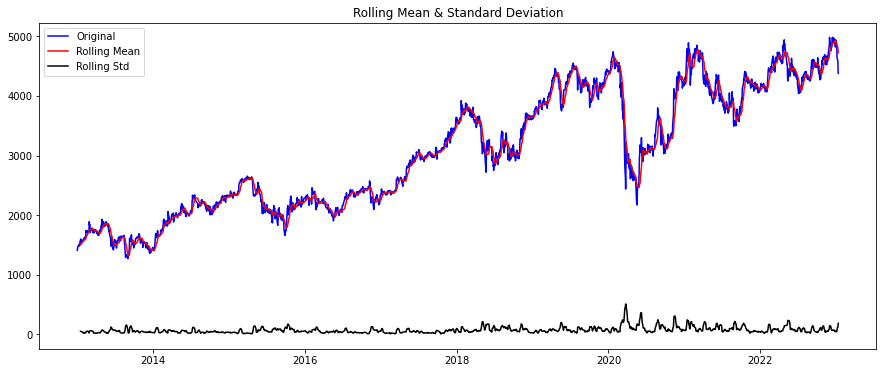

Result of Dickey-Fuller Test: 
Test Statuctic                   -1.668388
p-value                           0.447469
#Lags Used                        3.000000
Number of Observations Used    2490.000000
Critical Value (1%)              -3.432979
Critical Value (5%)              -2.862701
Critical Value (10%)             -2.567388
dtype: float64


In [ ]:
#Melakukan uji stasioneritas untuk dataset
test_stasionarity(series)

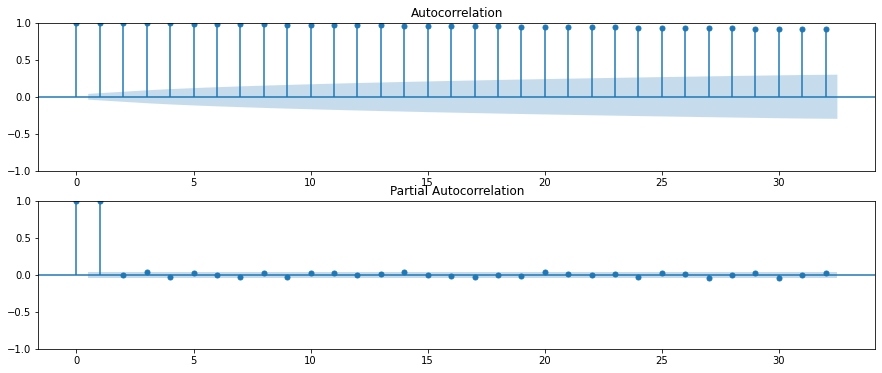

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure()
plt. subplot (211)
plot_acf(series, ax=plt.gca(), lags=32)
plt.subplot(212)
plot_pacf(series, ax=plt.gca(), lags=32)
plt.show()

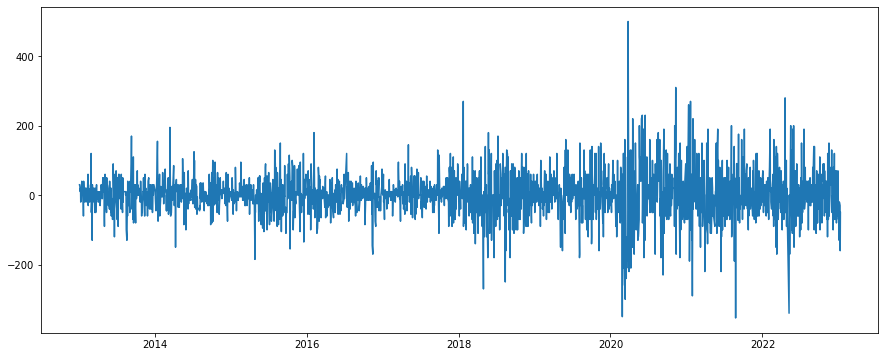

In [ ]:
series_diff_1 = series - series.shift()
series_diff_1 = series_diff_1.dropna()
plt.plot(series_diff_1)

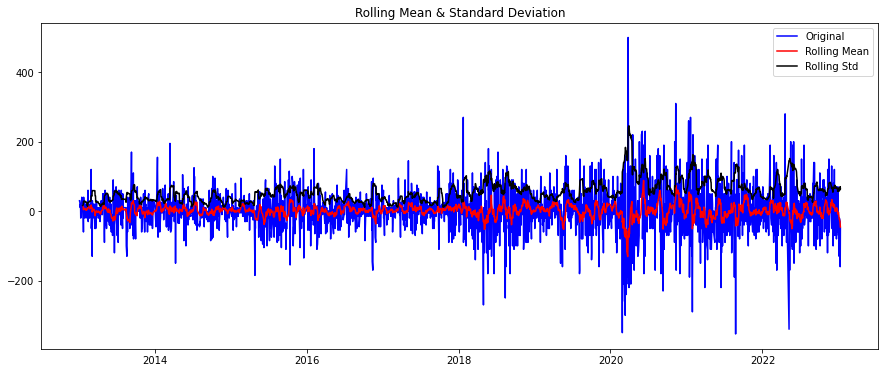

Result of Dickey-Fuller Test: 
Test Statuctic                  -28.857943
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    2490.000000
Critical Value (1%)              -3.432979
Critical Value (5%)              -2.862701
Critical Value (10%)             -2.567388
dtype: float64


In [ ]:
test_stasionarity(series_diff_1)

<Axes: xlabel='Date'>

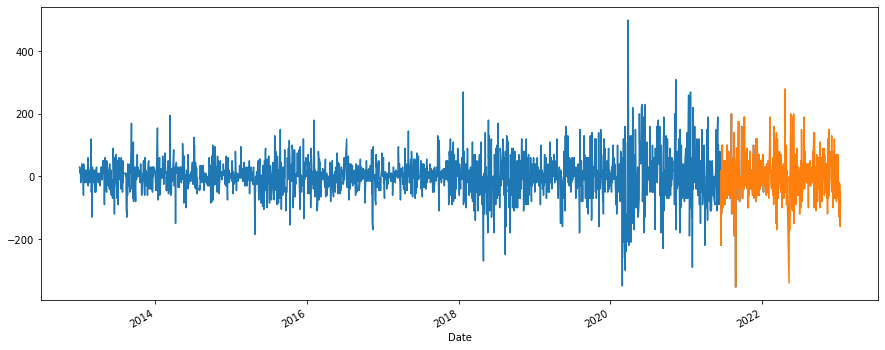

In [ ]:

train, test = series_diff_1[:2246], series_diff_1[2100:]
n = len(series_diff_1)
n_train = len(train)
n_test = len(test)

fig, ax = pyplot.subplots()
train.plot(ax=ax)
test.plot(ax=ax)

In [ ]:
import pmdarima as pm

def arimamodel(timeseries):
  automodel = pm.auto_arima(timeseries,
                            start_p=0,
                            start_q=2,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=None, D=1, trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)
  return automodel

In [ ]:
automodel = arimamodel(train)
print(automodel.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=13.35 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=26347.379, Time=0.25 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=25749.382, Time=7.96 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=26345.380, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=26343.932, Time=0.22 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=25438.065, Time=10.64 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=15.41 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.21 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=25437.292, Time=8.49 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=25749.011, Time=2.47 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=12.31 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=6.59 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=25437.788, Time=9.90 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   

In [ ]:
test.shape[0]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 6
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
model_ARIMA = auto_arima(series, order=(1,0,2)(2,1,0))
forecast = model_ARIMA.predict(n_periods=150)
print(forecast)

NameError: ignored

In [ ]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

2246   -17.714757
2247   -24.494294
2248   -12.331272
2249    11.183383
2250   -21.341952
          ...    
2634    -6.089897
2635    59.487001
2636   -43.860880
2637    13.168697
2638    -0.082665
Length: 393, dtype: float64

In [ ]:
pyplot.figure(figsize=(12,7))
#pyplot.plot(test.index, test, label='Actual')
pyplot.plot(test.index, predictions_arima, label='Predicted')
pyplot.title('Forecasting -SARIMA')
pyplot.xlabel('Tanggal')
pyplot.ylabel('Value')
pyplot.legend()

NameError: ignored

<Figure size 864x504 with 0 Axes>

In [ ]:
rmse = sqrt(mean_squared_error(test, predictions_arima))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 76.793


<Axes: >

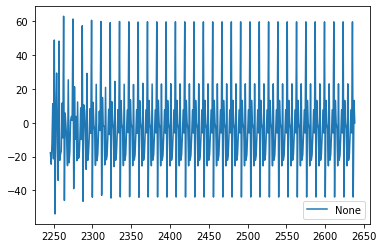

In [ ]:
predictions_arima.plot(legend = True)

In [ ]:
predict_dif = automodel.predict(start=2500, end = 2650)
predictions_dif_cum_sum = predict_dif.cumsum()
pred_testing = [series[-1]]
for i, j in enumerate(predictions_dif_cum_sum):
  a = pred_testing[i] + j
  pred_testing.append(a)
predict = pd.Series(pred_testing[1:], index=predict_dif.index)
print(predict)

2246    4362.285243
2247    4320.076191
2248    4265.535868
2249    4222.178928
2250    4157.480036
2251    4141.525853
2252    4071.746127
2253    4006.333713
2254    3970.219727
2255    3921.425763
dtype: float64


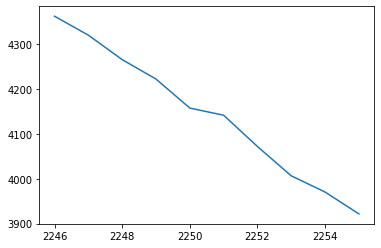

In [ ]:
plt.plot(predict)